## Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib. Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42. Масштабируйте данные с помощью StandardScaler. Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42. Постройте диаграмму рассеяния на этих данных.

In [1]:
# импортируем все модули, алгоритмы, активируем все настройки, что понадобятся нам в заданиях

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

%config InlineBackend.figure_format = 'svg'
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

In [2]:
# Загружаем "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
# Создаём датафреймы X и y из этих данных

boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['price'])

При применении к данным функции __reduce_mem_usage()__ немного меняется вид диаграмм рассеяния и итоговые данные вычисления средних значений price и CRIM отличаются на сотые доли от таких же значений, только полученных без применения reduce_mem_usage(), а т.к. "Boston House Prices dataset" весит всего ничего, я принял решение не применять reduce_mem_usage(), отдав предпочтение точности учебных вычислений снижению объёма данных. Но, если что, ниже ↓↓↓ способ использования reduce_mem_usage()

In [3]:
# %run reduce_mem_usage.ipynb
# reduce_mem_usage(X)
# reduce_mem_usage(y)

In [4]:
# Разбиваем эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции 
# train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, 
# при этом аргумент random_state равен 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Масштабируем данные с помощью StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=boston.feature_names)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=boston.feature_names)

In [6]:
# Строим модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [7]:
# посмотрим на первые строки:

X_train_tsne[:3]

array([[ 28.13809  ,  18.375324 ],
       [ -9.785578 ,  -4.5355387],
       [-15.695753 , -17.543627 ]], dtype=float32)

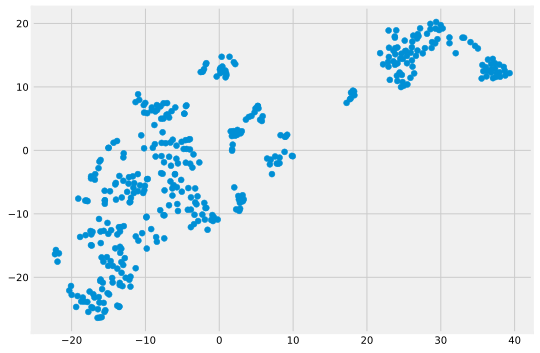

In [8]:
# Строим диаграмму рассеяния на этих данных.

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1]);

## Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42. Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами. Вычислите средние значения price и CRIM в разных кластерах.

In [9]:
# С помощью KMeans разбиваем данные из тренировочного набора на 3 кластера, используя все признаки из датафрейма X_train
# Параметр max_iter равен 100, random_state делаем равным 42

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

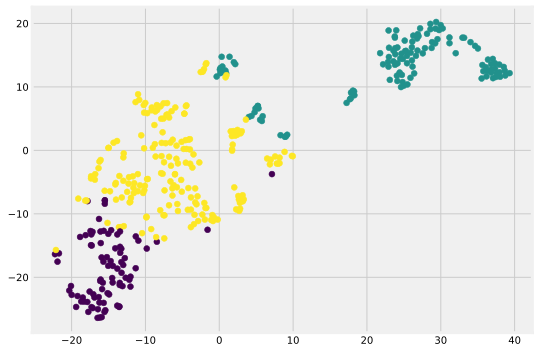

In [10]:
# Строим еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, 
# и раскрашиваем точки из разных кластеров разными цветами

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train);

In [11]:
# Вычисляем средние значения price и CRIM в разных кластерах

y_train_price_mean, X_train_CRIM_mean = [], []
for i in range(3):
    y_train_price_mean.append(round(float(y_train[labels_train==i].mean()), 3))
    X_train_CRIM_mean.append(round(X_train.CRIM[labels_train==i].mean(), 3))

# собираем для наглядности из train-данных датафрейм и отсортируем его по цене

TRAIN = pd.DataFrame({'all_y_train_price_mean': y_train_price_mean, 'all_X_train_CRIM_mean': X_train_CRIM_mean}, 
                     columns=['all_y_train_price_mean', 'all_X_train_CRIM_mean'])
TRAIN.sort_values('all_y_train_price_mean')

,all_y_train_price_mean,all_X_train_CRIM_mean
1,16.165,10.797
2,24.958,0.422
0,27.788,0.074


## *Задание 3

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора. Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [12]:
# Применяем TSNE
X_test_tsne = tsne.fit_transform(X_test_scaled)

# Применяем KMeans
labels_test = kmeans.predict(X_test_scaled)

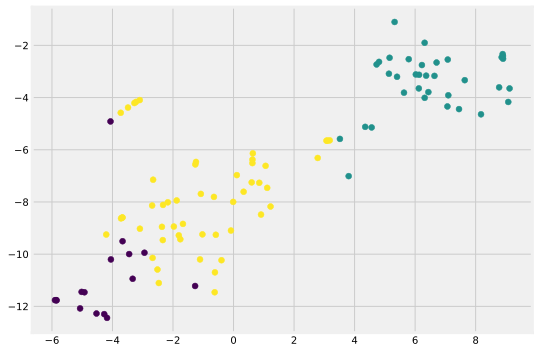

In [13]:
# Посмотрим на получившееся разбиение test-данных на диаграмме рассеяния

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test);

In [14]:
# Вычисляем средние значения price и CRIM в разных кластерах на тестовых данных.

y_test_price_mean, X_test_CRIM_mean = [], []
for i in range(3):
    y_test_price_mean.append(round(float(y_test[labels_test==i].mean()), 3))
    X_test_CRIM_mean.append(round(X_test.CRIM[labels_test==i].mean(), 3))
    
# собираем для наглядности из test-данных датафрейм и отсортируем его по цене
    
TEST = pd.DataFrame({'all_y_test_price_mean': y_test_price_mean, 'all_X_test_CRIM_mean': X_test_CRIM_mean}, 
                     columns=['all_y_test_price_mean', 'all_X_test_CRIM_mean'])
TEST.sort_values('all_y_test_price_mean')

,all_y_test_price_mean,all_X_test_CRIM_mean
1,16.437,10.166
2,21.861,0.266
0,31.350,0.062


In [15]:
# а теперь сложим TRAIN и TEST и посмотрим на полные данные

result = pd.DataFrame({'price': TRAIN.all_y_train_price_mean + TEST.all_y_test_price_mean,
                       'CRIM': TRAIN.all_X_train_CRIM_mean + TEST.all_X_test_CRIM_mean},
                      columns=['price', 'CRIM'])
result.sort_values('price')

,price,CRIM
1,32.602,20.963
2,46.819,0.688
0,59.138,0.136


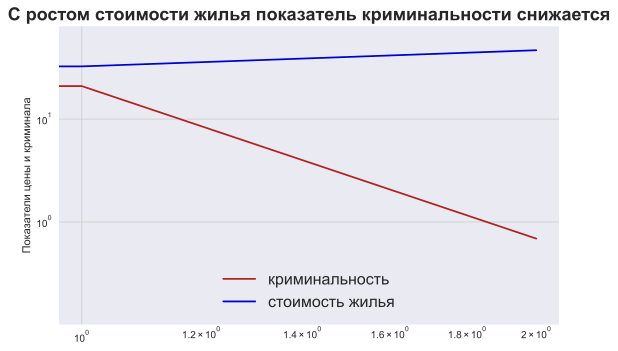

In [16]:
# и дополнительно для наглядности - мы можем визуализировать данные, 
# на получившемся графике будет явно видно падение уровня преступности при увеличении стоимости жилья

plt.style.use('seaborn')
plt.plot(result.CRIM, label='криминальность', color='#B22222')
plt.plot(result.price, label='стоимость жилья', color='#0000CD')
plt.xscale(value='log')
plt.yscale(value='log')
plt.grid(color = '#D3D3D3')
plt.legend(loc='lower center', fontsize = 16)
plt.ylabel('Показатели цены и криминала')
plt.title('С ростом стоимости жилья показатель криминальности снижается', fontweight='bold', fontsize=18);